# Dataset Description

In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

## Data Field Descriptions

- ```PassengerId``` - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- ```HomePlanet``` - The planet the passenger departed from, typically their planet of permanent residence.
- ```CryoSleep``` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- ```Cabin``` - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- ```Destination``` - The planet the passenger will be debarking to.
- ```Age``` - The age of the passenger.
- ```VIP``` - Whether the passenger has paid for special VIP service during the voyage.
- ```RoomService```, ```FoodCourt```, ```ShoppingMall```, ```Spa```, ```VRDeck``` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- ```Name``` - The first and last names of the passenger.
- ```Transported``` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

# Importing Data

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="dark",palette="deep")
pd.set_option("display.max.rows",None)
pd.set_option("display.max.columns",None)

In [2]:
train_data = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

# Exploring Training Data

In [3]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


## Drop irrelevant columns


In [6]:
train_data = train_data.drop(["PassengerId", "Name"], axis=1)

## Numerical Columns

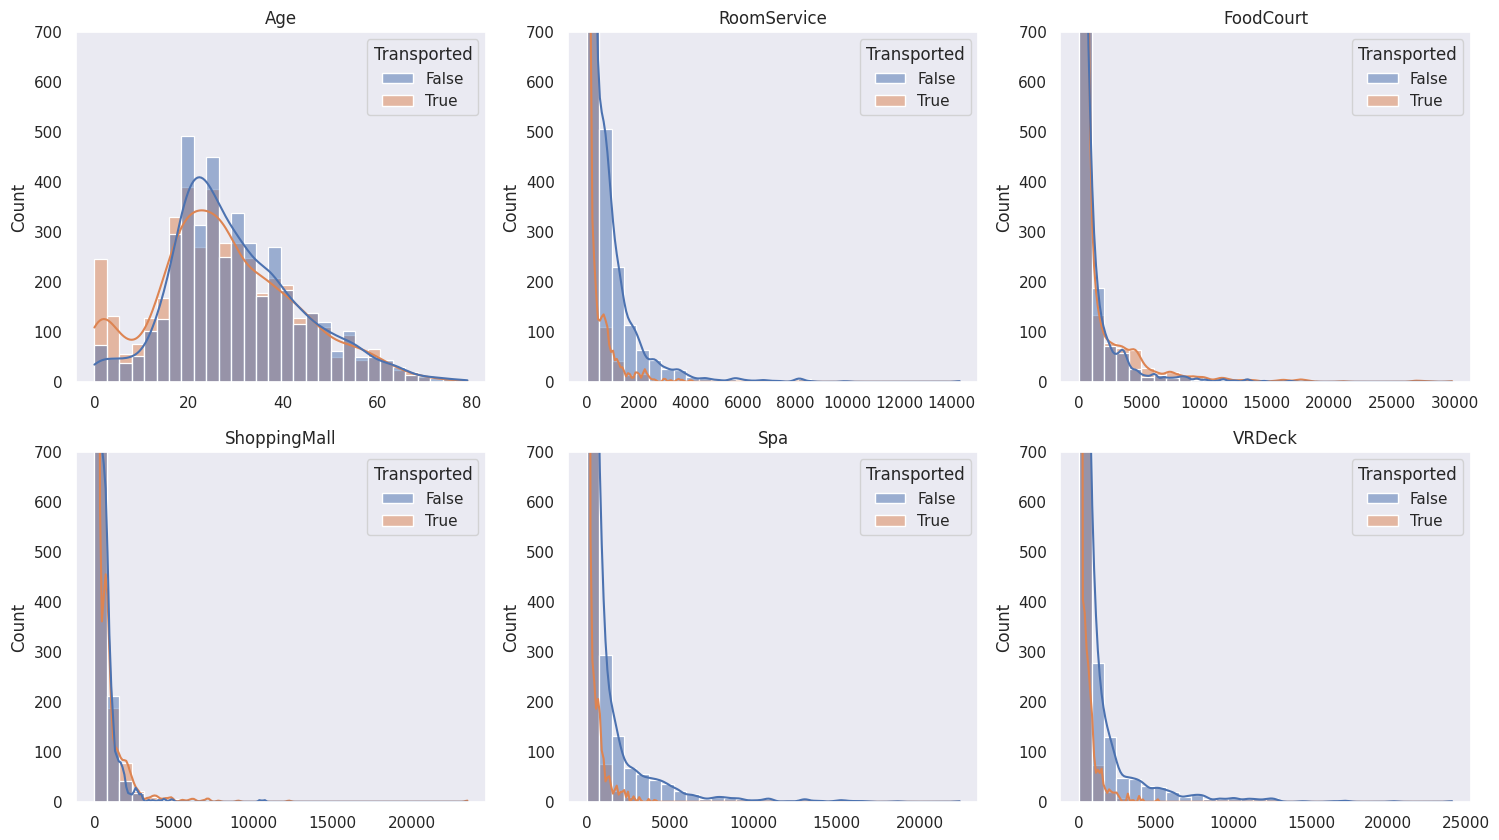

In [7]:
categories = np.reshape(["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"], (2,3))

fig, axs = plt.subplots(2, 3, figsize=(18, 10))

for i in range(2):
    for j in range(3):
        axs[i][j].set_title(categories[i][j])
        sns.histplot(x=train_data[categories[i][j]], hue=train_data.Transported, bins=30, ax=axs[i][j], kde=True).set(xlabel=None)
        axs[i][j].set_ylim(0,700)

The majority of the sample is composed of young adults (about 20-30 years old)

Also, most of the young individuals (0-19 years old) survived

Majority of individuals didn't spend on aditional services

## Categorical Columns

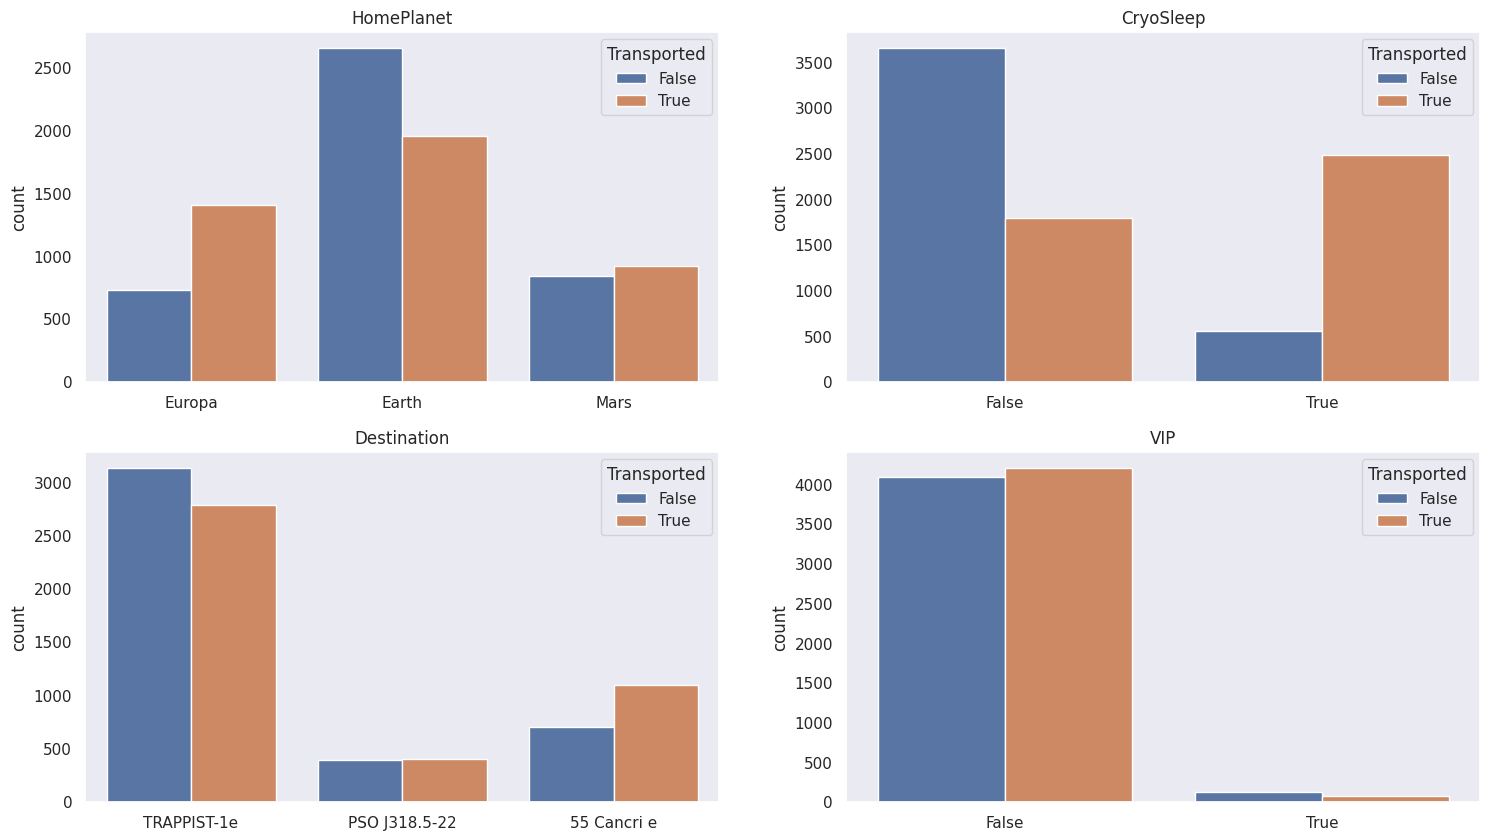

In [8]:
categories = np.reshape(["HomePlanet", "CryoSleep", "Destination", "VIP"], (2,2))

fig, axs = plt.subplots(2, 2, figsize=(18, 10))

for i in range(2):
    for j in range(2):
        axs[i][j].set_title(categories[i][j])
        sns.countplot(x=train_data[categories[i][j]], hue=train_data.Transported, ax=axs[i][j]).set(xlabel=None)

Majority of passengers in Cryo Sleep survived

# Feature Engineering

## Cabin

Cabins are registred in "deck/num/side" form. We'll sepperate it into different columns

In [9]:
cabins = train_data.Cabin.str.split("/", expand=True)
cabins = cabins.rename(columns={0: "CabinDeck", 1: "CabinNumber", 2: "CabinSide"})
cabins.head()

,CabinDeck,CabinNumber,CabinSide
0,B,0,P
1,F,0,S
2,A,0,S
3,A,0,S
4,F,1,S


In [10]:
train_data = train_data.drop("Cabin", axis=1)
train_data = pd.concat([train_data, cabins], axis=1)

<Axes: title={'center': 'Cabin Side'}, xlabel='CabinSide', ylabel='count'>

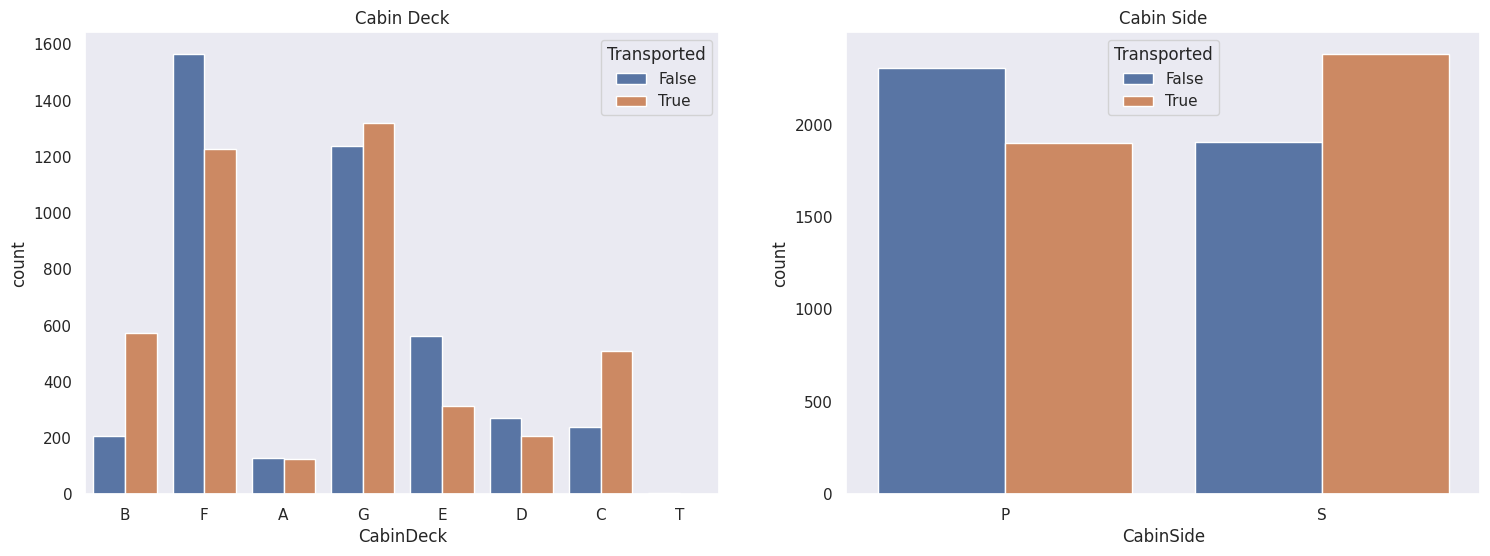

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

axs[0].set_title("Cabin Deck")
sns.countplot(x=train_data["CabinDeck"], hue=train_data.Transported, ax=axs[0])

axs[1].set_title("Cabin Side")
sns.countplot(x=train_data["CabinSide"], hue=train_data.Transported, ax=axs[1])

In [12]:
# Cabin Deck and Number combination have influence on the result
train_data["CabinCombination"] = train_data["CabinDeck"] + train_data["CabinNumber"]

## Service Expense

Sum RoomService, FoodCourt, ShoppingMall, Spa and VRDeck to find total expense
See if individual didn't spend on services

In [13]:
train_data["ServiceExpense"] = train_data[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].sum(axis=1)

train_data["NoExpenses"] = train_data[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].gt(0).sum(axis=1)
train_data["NoExpenses"] = train_data["NoExpenses"].apply(lambda x: 1 if x == 0 else 0)

<Axes: title={'center': 'No Expenses'}, xlabel='NoExpenses', ylabel='count'>

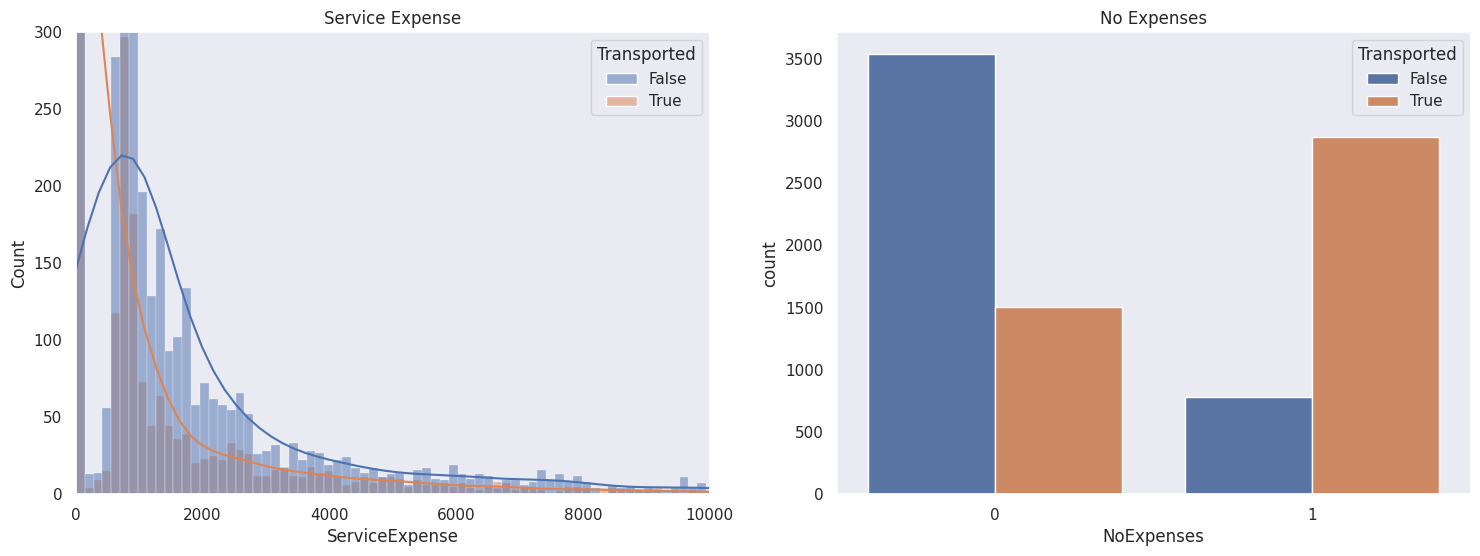

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

axs[0].set_title("Service Expense")
sns.histplot(x=train_data["ServiceExpense"], hue=train_data.Transported, kde=True, ax=axs[0])
axs[0].set_ylim(0,300)
axs[0].set_xlim(0,10000)

axs[1].set_title("No Expenses")
sns.countplot(x=train_data["NoExpenses"], hue=train_data.Transported, ax=axs[1])

## Age groups

We'll group individuals in age intervals

In [15]:
def group_ages(df):
    lab_=["Age_0-18","Age_19-25","Age_26-32","Age_33_50","age_50+"]
    bin_=[0,18,25,32,50,float('inf')]
    df["age_group"]=pd.cut(df["Age"],labels=lab_,bins=bin_)
    
group_ages(train_data)

<Axes: xlabel='age_group', ylabel='count'>

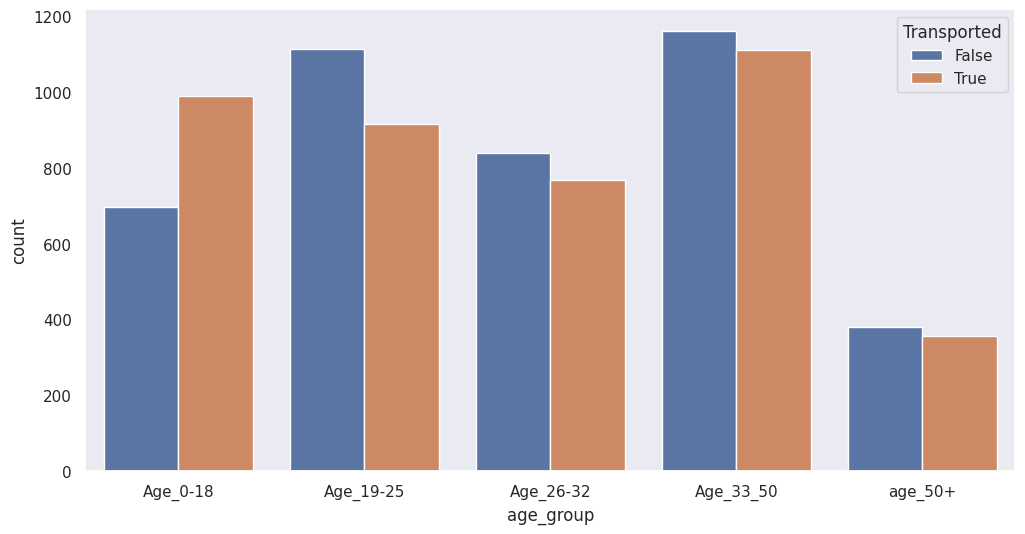

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(x=train_data["age_group"],hue="Transported",data=train_data)

# Model Evaluation

## Prepare Training Data

In [17]:
# Boolean to 0 and 1
train_data.VIP = train_data.VIP.replace({True: 1, False: 0})
train_data.CryoSleep = train_data.CryoSleep.replace({True: 1, False: 0})

X = train_data.drop("Transported", axis=1)
y = train_data.Transported

## Set Pipeline Function

We'll be using a SimpleImputer to handle missing values (numerical > mean, categorical > most frequent). And for encoding categorical data, we'll use  OneHotEncoder.

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [19]:
def create_pipeline(model, training_data):
    numerical_cols = training_data.select_dtypes(include='number').columns
    categorical_cols = training_data.select_dtypes(include='object').columns

    # Preprocessing for numerical data
    numerical_transformer = SimpleImputer(strategy='median')

    # Preprocessing for categorical data
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    #Bundling
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])

    return Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

## Random Forest Classifier

First, we'll evaluate a Random Forest Classifier. We'll use a GridSearchCV to find the best Hyperparameters and evaluate the model based on accuracy.

In [20]:
from sklearn.ensemble import RandomForestClassifier

pipe = create_pipeline(RandomForestClassifier(random_state=1, n_jobs=4), X)

### GridSearch

When setting a Pipeline inside a GridSearchCV, you can access the model's parameters by calling its name followed by "\__". (e.g. "model__n_estimators")

In [21]:
from sklearn.model_selection import GridSearchCV

params = {
    "model__n_estimators" : [100, 250, 300, 500],
    'model__bootstrap': [True, False]
}

cv = GridSearchCV(pipe, params, cv=5, scoring="accuracy", verbose=0)

In [22]:
# cv.fit(X, y)

In [23]:
# results = pd.DataFrame(cv.cv_results_).sort_values("rank_test_score").head()
# results

## XGBoost

Now, we'll evaluate a XGBoostClassifier. We'll set up a Pipeline for encodings (XGBoost already deals with missing values) and then we'll use a GridSearchCV to find the best Hyperparameters and evaluate the model based on accuracy.

In [24]:
from xgboost import XGBClassifier

pipe = create_pipeline(XGBClassifier(random_state=1, n_jobs=4), X)

In [25]:
params = {
    "model__n_estimators" : [200, 300, 500],
    'model__learning_rate': [0.01, 0.05, 0.1],
    "model__max_depth" : [5, 6, 7, None]
}

cv = GridSearchCV(pipe, params, cv=5, scoring="accuracy", verbose=0)

In [26]:
# cv.fit(X, y)

In [27]:
# results = pd.DataFrame(cv.cv_results_).sort_values("rank_test_score").head()
# results

# Final Model

XGBoost Classifier performed best, with around 80.4% accuracy score

In [28]:
finalModel = XGBClassifier(
    random_state=1,
    learning_rate=0.1,
    max_depth=5,
    n_estimators=200
)

final_pipe = create_pipeline(finalModel, X)

In [29]:
final_pipe.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'ServiceExpense', 'NoExpenses'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unkno...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, random_state=1, ...))])

### Rearrange Test data

In [30]:
passengerIds = test_data["PassengerId"]

# Drop names and ids
test_data = test_data.drop(["PassengerId", "Name"], axis=1)

# Set cabins
test_cabins = test_data.Cabin.str.split("/", expand=True)
test_cabins = test_cabins.rename(columns={0: "CabinDeck", 1: "CabinNumber", 2: "CabinSide"})

test_data = test_data.drop("Cabin", axis=1)
test_data = pd.concat([test_data, test_cabins], axis=1)

test_data["CabinCombination"] = test_data["CabinDeck"] + test_data["CabinNumber"]

# Set Expenses
test_data["ServiceExpense"] = test_data[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].sum(axis=1)

test_data["NoExpenses"] = test_data[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].gt(0).sum(axis=1)
test_data["NoExpenses"] = test_data["NoExpenses"].apply(lambda x: 1 if x == 0 else 0)

# Set age grouping
group_ages(test_data)

# Boolean to 0 and 1
test_data.VIP = test_data.VIP.replace({True: 1, False: 0})
test_data.CryoSleep = test_data.CryoSleep.replace({True: 1, False: 0})


test_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinDeck,CabinNumber,CabinSide,CabinCombination,ServiceExpense,NoExpenses,age_group
0,Earth,1.0,TRAPPIST-1e,27.0,0.0,0.0,0.0,0.0,0.0,0.0,G,3,S,G3,0.0,1,Age_26-32
1,Earth,0.0,TRAPPIST-1e,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,F,4,S,F4,2832.0,0,Age_19-25
2,Europa,1.0,55 Cancri e,31.0,0.0,0.0,0.0,0.0,0.0,0.0,C,0,S,C0,0.0,1,Age_26-32
3,Europa,0.0,TRAPPIST-1e,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,C,1,S,C1,7418.0,0,Age_33_50
4,Earth,0.0,TRAPPIST-1e,20.0,0.0,10.0,0.0,635.0,0.0,0.0,F,5,S,F5,645.0,0,Age_19-25


In [31]:
test_data_predictions = final_pipe.predict(test_data).astype(bool)

In [32]:
submission = pd.DataFrame({'PassengerId': passengerIds, 'Transported': test_data_predictions})
submission.to_csv('submission.csv', index=False)
print("Successfuly created csv")

Successfuly created csv
